In [35]:
import numpy as np
import os

In [33]:
from keras import backend
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [27]:
from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter

In [36]:
# Image data directory
im_dir = "../../app/resources/images/"

# Working with a single image

In [37]:
im_path = os.path.join(im_dir, "0104_iss_big.jpg")

img = Image.open(im_path)

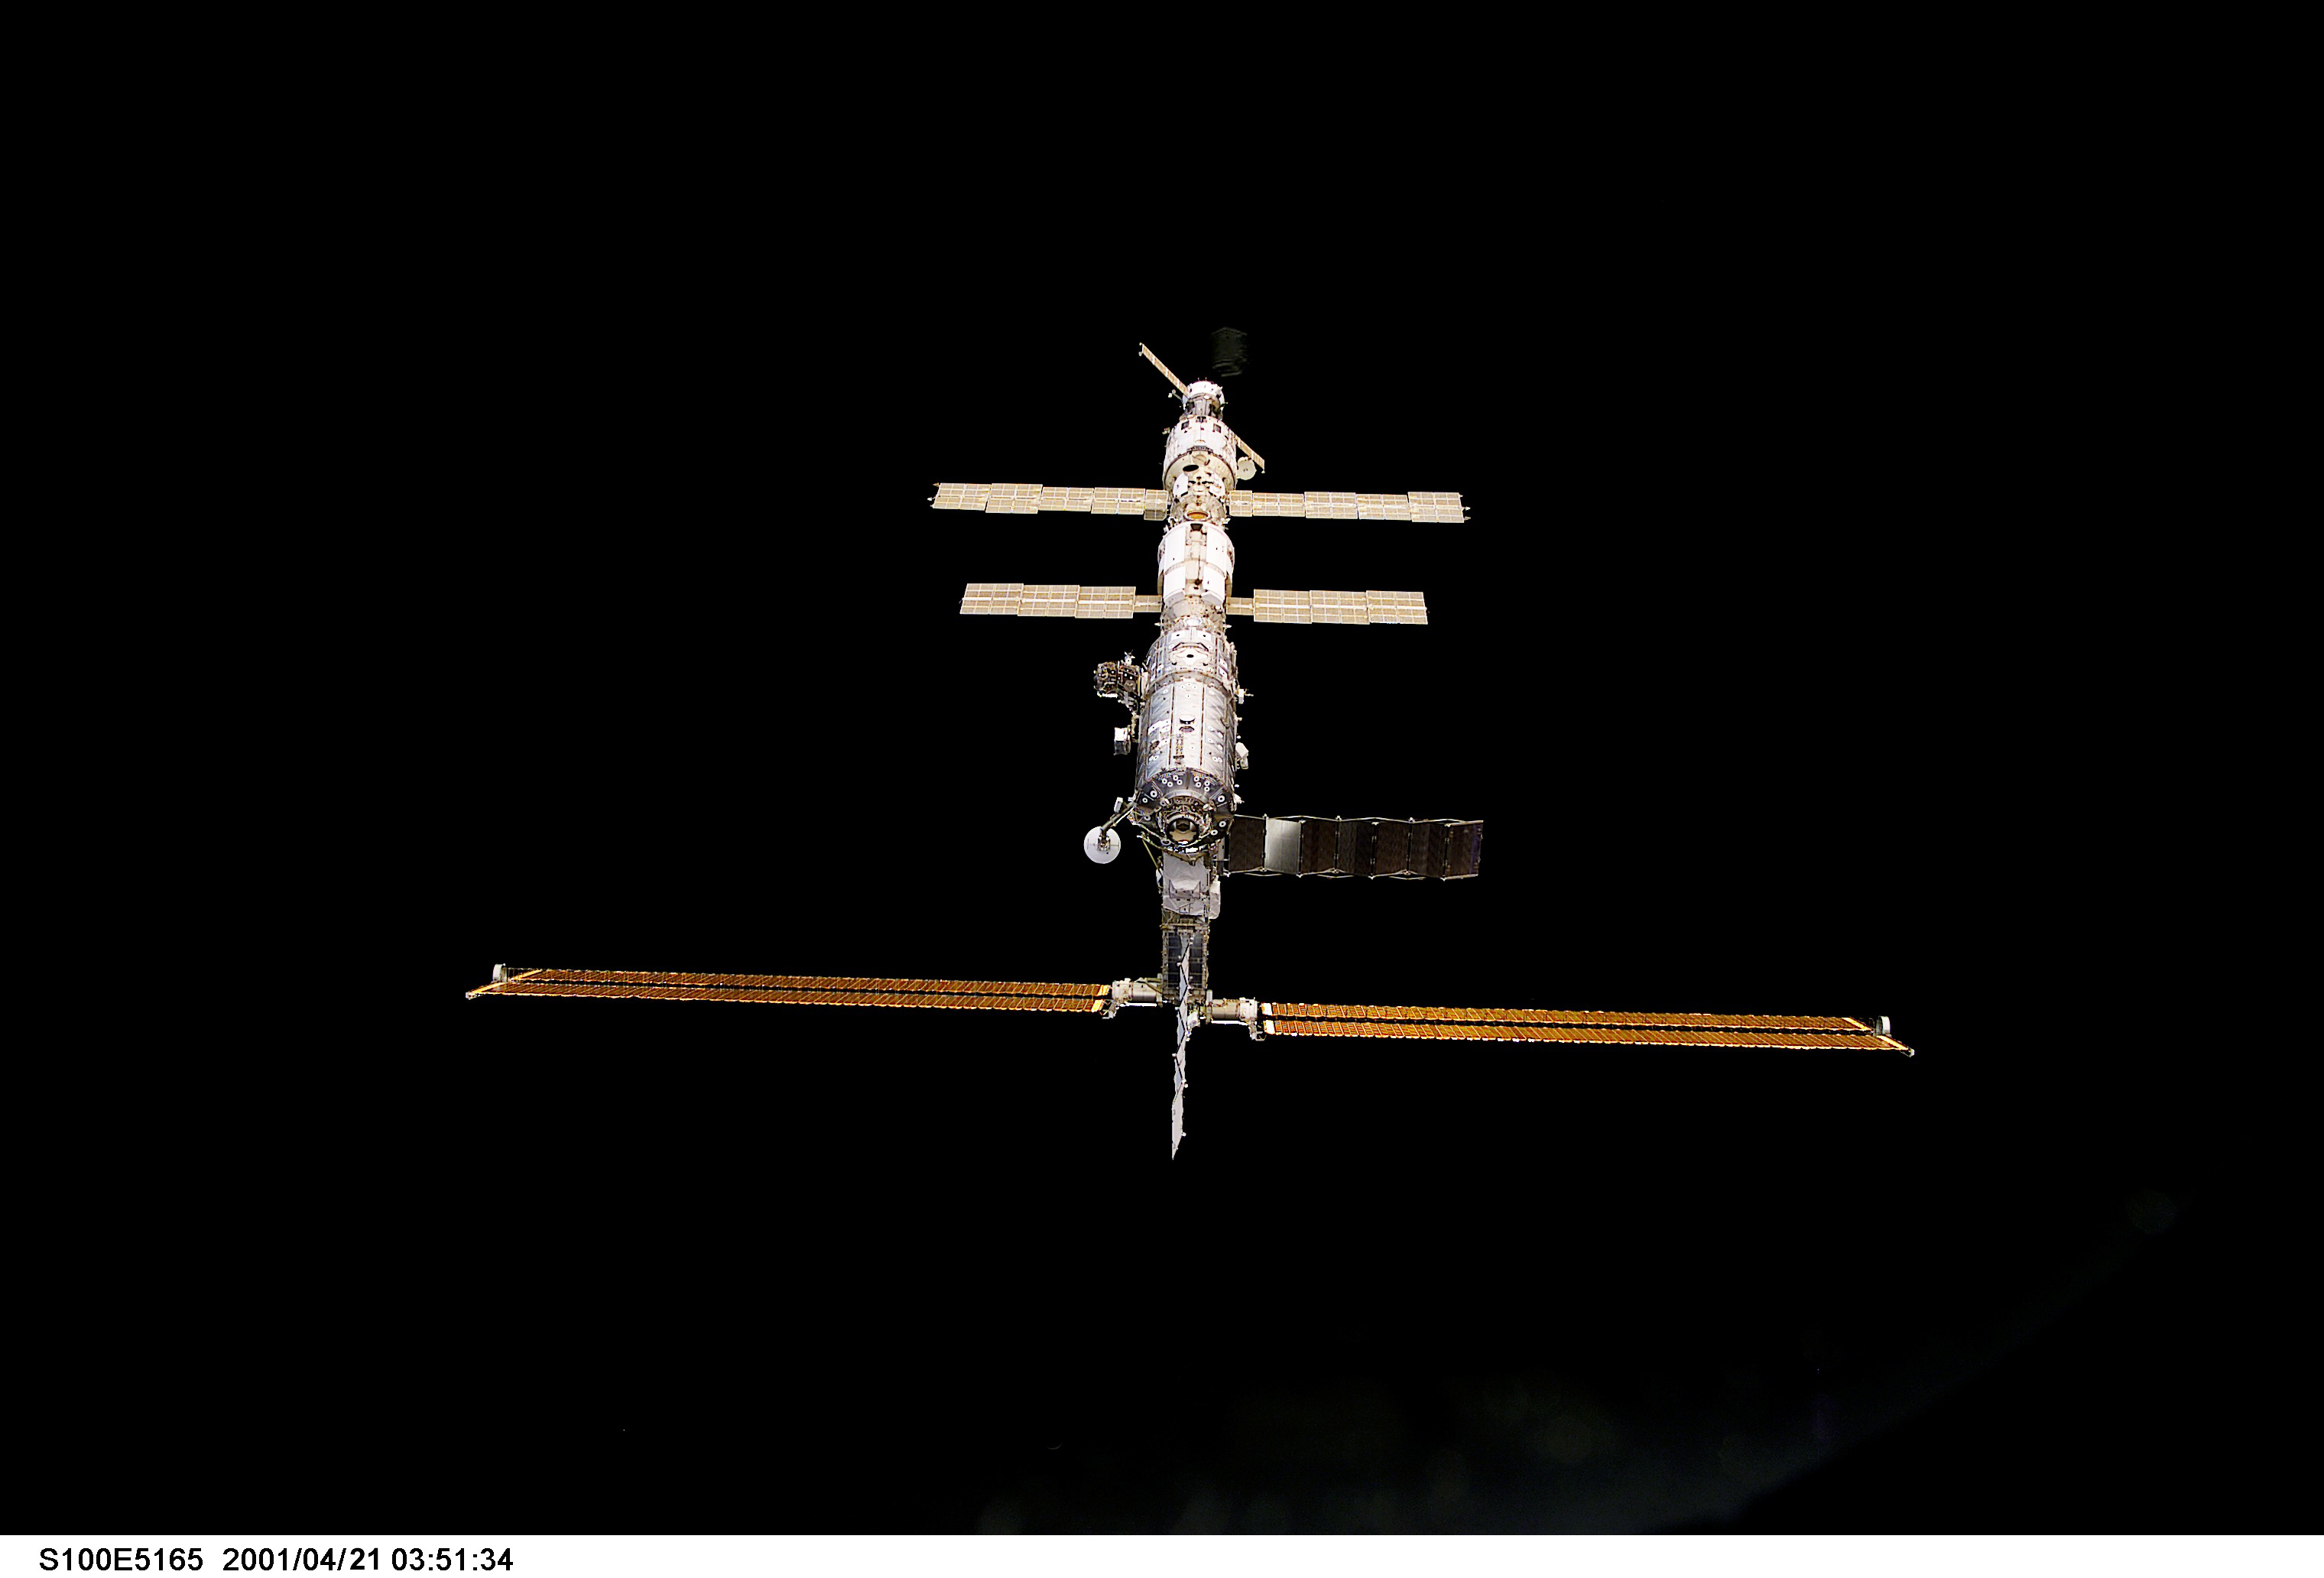

In [38]:
img

In [39]:
# Desired crop size: (width, height)
crop_size = (224, 224)

In [40]:
# Resize and middle-crop the image
resized_img = ImageOps.fit(img, crop_size)

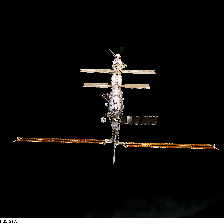

In [41]:
resized_img

In [9]:
# Apply the Gaussian Filter
filtered_img = resized_img.filter(ImageFilter.GaussianBlur())

In [ ]:
img, filtered_img

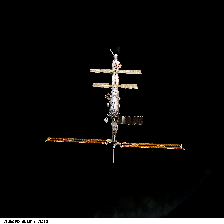

In [15]:
img

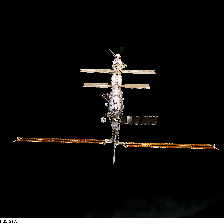

In [16]:
resized_img

In [28]:
x = image.img_to_array(filtered_img)

In [ ]:
x = np.expand_dims(x, axis=0)

In [ ]:
x = preprocess_input(x)

In [29]:
features = model.predict(x)

# Generating features from all images

We will use the pre-trained VGG16 model to generate bottleneck features. The following steps are taken to get the features:

1. We use the `ImageDataGenerator` to generate batches of tensor image data
2. We use the `ImageDataGenerator`.`flow_from_directory()` to take the path to a directory and generate batches of data
3. Load the VGG16 pre-trained model without including the top layer
4. We use the sequential model's `predict_generator()` to extract the bottleneck features

In [31]:
# Arguments for ImageDataGenerator
data_gen_args = dict(rescale=1./255)

In [34]:
# Initialize image data generator
image_datagen = ImageDataGenerator(**data_gen_args)

In [43]:
# Get an image generator
image_generator = image_datagen.flow_from_directory(
    im_dir,
    target_size=crop_size,
    class_mode=None,
    shuffle=False)

Found 3999 images belonging to 1 classes.


In [12]:
# Load the pre-trained model
model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 78s 1us/step


In [45]:
# Extract bottleneck features
features = model.predict_generator(
    image_generator,
    use_multiprocessing=True,
    verbose=1)

 48/125 [==========>...................] - ETA: 33:55

/Users/abhinavsood/anaconda3/lib/python3.6/site-packages/PIL/Image.py:2514: DecompressionBombWarning: Image size (105545760 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


125/125 [==============================] - 3231s 26s/step


In [47]:
# Save bottleneck features
np.save(os.path.join('../../app/resources/features/bottleneck_features.npy'), features)